In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import pydotplus
import matplotlib.pyplot as plt

In [2]:
# Import the dataset
data = pd.read_csv('loan_data_set.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Drop the columns which are not required
data = data.drop(['Loan_ID'], axis=1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Label Encode Gender, Married, Education, Self_Employed, Property_Area, Loan_Status
le = LabelEncoder()
data['Gender']= le.fit_transform(data['Gender'])
data['Married']= le.fit_transform(data['Married'])
data['Education']= le.fit_transform(data['Education'])
data['Self_Employed']= le.fit_transform(data['Self_Employed'])
data['Property_Area']= le.fit_transform(data['Property_Area'])
data['Loan_Status']= le.fit_transform(data['Loan_Status'])
data['Dependents']= le.fit_transform(data['Dependents'])
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,NaN,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [5]:
# Replace the missing values with the mean of the column
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [6]:
# Remove missing values
data = data.dropna()

In [7]:
# Drop columns Gender, Married, Education, Self_Employed, Property_Area, Loan_Status
data = data.drop(['Gender', 'CoapplicantIncome', 'Dependents', 'Married', 'Self_Employed', 'Property_Area', 'Education'], axis=1)

In [8]:
# Apply Standard Scaler on the entire dataset except the target column
scaler = StandardScaler()
data[['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']] = scaler.fit_transform(data[['ApplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']])
data

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.072991,0.000000,0.279851,0.451640,1
1,-0.134412,-0.219273,0.279851,0.451640,0
2,-0.393747,-0.957641,0.279851,0.451640,1
3,-0.462062,-0.314547,0.279851,0.451640,1
4,0.097728,-0.064454,0.279851,0.451640,1
...,...,...,...,...,...
609,-0.410130,-0.898095,0.279851,0.451640,1
610,-0.212557,-1.267279,-2.518655,0.451640,1
611,0.437174,1.269371,0.279851,0.451640,1
612,0.357064,0.483367,0.279851,0.451640,1


In [9]:
# Put the data into X and y
X = data.drop(['Loan_Status'], axis=1)
y = data['Loan_Status']

In [10]:
# Use Decision Tree Regressor to predict the Loan_Status
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
regressor = tree.DecisionTreeClassifier(max_depth=4)
regressor = regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [12]:
data

,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,0.072991,0.000000,0.279851,0.451640,1
1,-0.134412,-0.219273,0.279851,0.451640,0
2,-0.393747,-0.957641,0.279851,0.451640,1
3,-0.462062,-0.314547,0.279851,0.451640,1
4,0.097728,-0.064454,0.279851,0.451640,1
...,...,...,...,...,...
609,-0.410130,-0.898095,0.279851,0.451640,1
610,-0.212557,-1.267279,-2.518655,0.451640,1
611,0.437174,1.269371,0.279851,0.451640,1
612,0.357064,0.483367,0.279851,0.451640,1


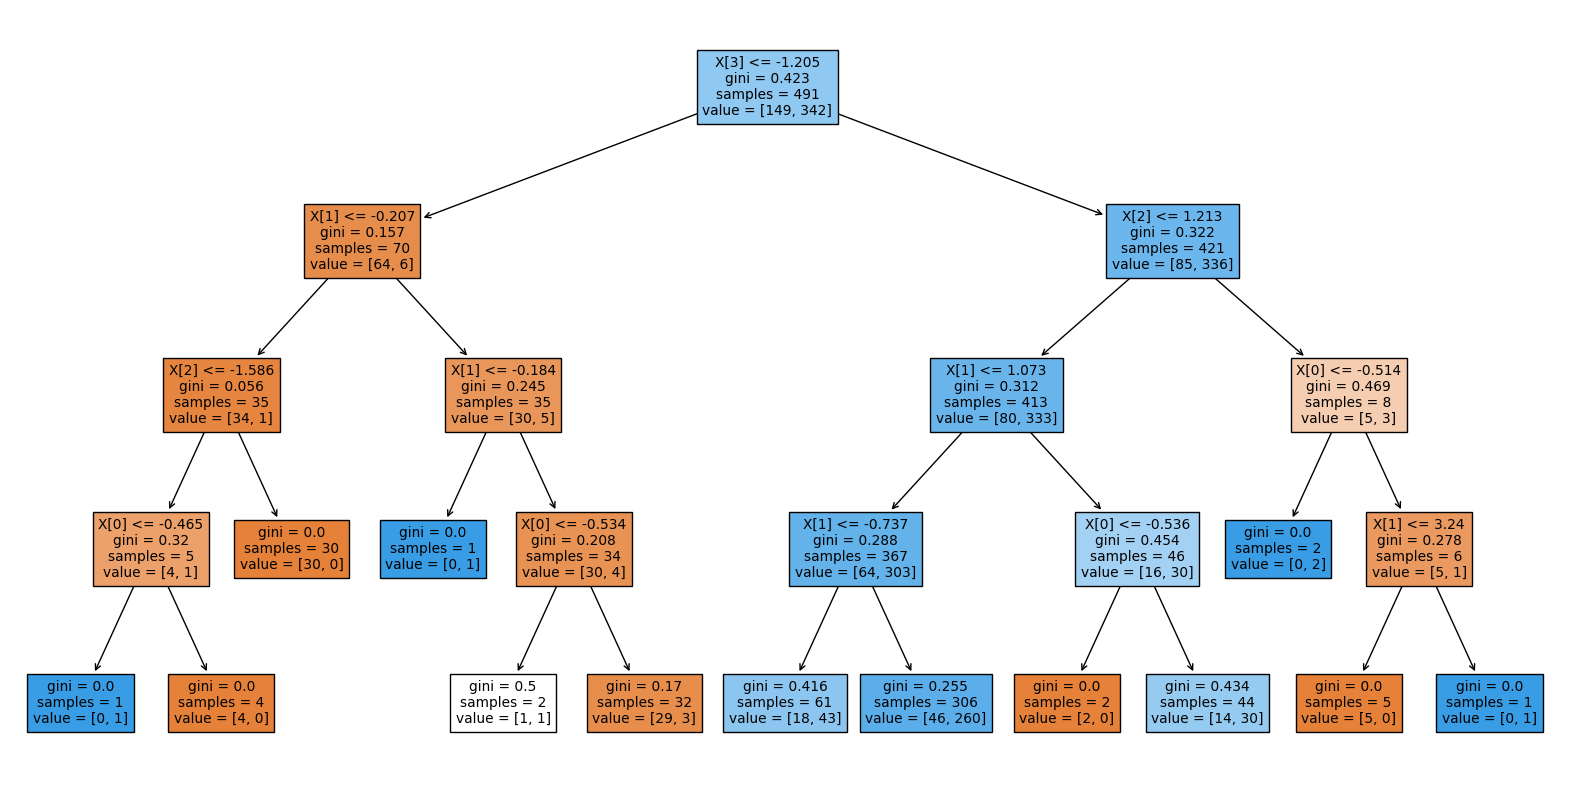

In [14]:
# Plot the Decision Tree using tree.plot_tree
plt.figure(figsize=(20,10))
tree.plot_tree(regressor, filled=True)
plt.show()

In [ ]:
dot_data = tree.export_graphviz(regressor, out_file=None, feature_names=X.columns, class_names=['0', '1'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)

# empty all nodes, i.e.set color to white and number of samples to zero
for node in graph.get_node_list():
    if node.get_attributes().get('label') is None:
        continue
    if 'samples = ' in node.get_attributes()['label']:
        labels = node.get_attributes()['label'].split('<br/>')
        for i, label in enumerate(labels):
            if label.startswith('samples = '):
                labels[i] = 'samples = 0'
        node.set('label', '<br/>'.join(labels))
        node.set_fillcolor('white')

# Pick one row from X_test and store in samples
samples = X_test.iloc[0:1]
decision_paths = regressor.decision_path(samples)

for decision_path in decision_paths:
    for n, node_value in enumerate(decision_path.toarray()[0]):
        if node_value == 0:
            continue
        node = graph.get_node(str(n))[0]            
        node.set_fillcolor('green')
        labels = node.get_attributes()['label'].split('<br/>')
        for i, label in enumerate(labels):
            if label.startswith('samples = '):
                labels[i] = 'samples = {}'.format(int(label.split('=')[1]) + 1)

        node.set('label', '<br/>'.join(labels))

filename = 'tree.png'
graph.write_png(filename)

InvocationException: GraphViz's executables not found